In [139]:
import numpy as np
import os
import tensorflow as tf

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import scipy
from scipy.misc import imresize
from scipy import ndimage

from datasets import imagenet
from nets import resnet_v1
#from preprocessing import 
from tensorflow.contrib import slim
from datasets import dataset_utils


In [312]:
url = 'http://download.tensorflow.org/models/resnet_v1_152_2016_08_28.tar.gz'
checkpoints_dir = 'C:\\Users\\USER\\AnacondaProjects\\checkpoints'
dataset_utils.download_and_uncompress_tarball(url, checkpoints_dir)

>> Downloading resnet_v1_152_2016_08_28.tar.gz 99.0%

In [141]:
def preprocess_images(data,img_size):
    res_img = []
    for i in range(len(data)):
        res_img.append(imresize(data[i],[img_size,img_size]))
    return res_img

In [344]:
tf.reset_default_graph()

image_size = resnet_v1.resnet_v1.default_image_size
image=tf.placeholder(dtype='float32',shape=[None,image_size,image_size,3])

#processed_images = preprocess_images(image, image_size)
#processed_images  = tf.expand_dims(img_processed, 0)
#print(img_processed)

with slim.arg_scope(resnet_v1.resnet_arg_scope()):
    logits, tensors_list = resnet_v1.resnet_v1_50(image, num_classes=1000, is_training=False)
    
llayer = tensors_list.get('global_pool',None)
init_fn = slim.assign_from_checkpoint_fn(
    os.path.join(checkpoints_dir, 'resnet_v1_50.ckpt'),
    slim.get_model_variables())

In [345]:
#data = tf.keras.datasets.cifar10.load_data()
from PIL import Image

#n02113799 n12267677
path1 = 'C:\\Users\\USER\\AnacondaProjects\\flowers\\sunflower'
path2 = 'C:\\Users\\USER\\AnacondaProjects\\flowers\\tulip'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = np.array(mpimg.imread(os.path.join(folder,filename)))
        images.append(img)
    
    images = preprocess_images(images,image_size)
    return np.array(images)

X_train1 =load_images_from_folder(path1)
y_train1 = np.array([0]*X_train1.shape[0])

X_train2 = load_images_from_folder(path2)
y_train2 = np.array([1]*X_train2.shape[0])

X_train = np.vstack([X_train1,X_train2])
y_train = np.hstack([y_train1,y_train2])


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


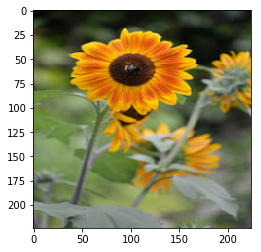

0


In [346]:
plt.imshow(X_train[712])
plt.show()
print(y_train[712])

In [347]:
n_train = X_train.shape[0]
print(n_train)
#n_test = X_test.shape[0]


1718


In [348]:
n_batch=8
X_dims = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    init_fn(sess)
    batch = range(0,X_train.shape[0]-n_batch+1,n_batch)
    for i in batch:
        #print(i)
        #processed_images = preprocess_images(X_train[i:i+n_batch,:], image_size)
        processed_images = X_train[i:i+n_batch,:]
        [last] = sess.run([llayer],feed_dict={image:processed_images})
        for j in range(len(last)):
            #print(np.squeeze(last[i]).reshape(1,-1))
            X_dims.append(np.squeeze(last[j]))
        print('loading {0}%'.format(i/X_train.shape[0]))

INFO:tensorflow:Restoring parameters from C:\Users\USER\AnacondaProjects\checkpoints\resnet_v1_50.ckpt
loading 0.0%
loading 0.004656577415599534%
loading 0.009313154831199068%
loading 0.013969732246798603%
loading 0.018626309662398137%
loading 0.023282887077997673%
loading 0.027939464493597205%
loading 0.03259604190919674%
loading 0.037252619324796274%
loading 0.04190919674039581%
loading 0.046565774155995346%
loading 0.051222351571594875%
loading 0.05587892898719441%
loading 0.06053550640279395%
loading 0.06519208381839348%
loading 0.06984866123399301%
loading 0.07450523864959255%
loading 0.07916181606519208%
loading 0.08381839348079162%
loading 0.08847497089639116%
loading 0.09313154831199069%
loading 0.09778812572759023%
loading 0.10244470314318975%
loading 0.10710128055878929%
loading 0.11175785797438882%
loading 0.11641443538998836%
loading 0.1210710128055879%
loading 0.12572759022118743%
loading 0.13038416763678695%
loading 0.1350407450523865%
loading 0.13969732246798602%
loading

for i in range(X_dims.shape[0]):
    X_dims[i] = np.array(X_dims[i])

X_dims_new = np.vstack([x for x in X_dims])

In [278]:
print(X_dims_new.shape)

NameError: name 'X_dims_new' is not defined

In [183]:
#X_modified = np.loadtxt('array.txt')

In [349]:
X_modified = np.array(X_dims)
print(X_modified.shape)

(1712, 2048)


In [350]:
from sklearn.cluster import MiniBatchKMeans,AgglomerativeClustering,Birch

In [356]:
clustering = AgglomerativeClustering(n_clusters = 2)

In [357]:
clustering.fit(X_modified)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000001D6D59D3BF8>)

In [358]:
#y_train = data[0][1]

#indices1 = (y_train==1)
#indices7 = (y_train==7)
#indices = np.where(np.logical_or(indices1,indices7))[0]

#y_train = y_train[indices]

#y_train[y_train == 1]=0
#y_train[y_train == 7]=1

#labels=clustering.predict(X_modified)
labels = clustering.labels_
labels = 1-labels
print(*labels)

0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [359]:
print(y_train.shape)
y_res = labels+y_train[0:1712]

(1718,)


In [360]:
y_res[y_res!=1].shape[0]/y_res.shape[0]

0.8253504672897196

(5004,)

In [316]:
for i in tensors_list:
    print(i, tensors_list[i])

resnet_v1_152/conv1 Tensor("resnet_v1_152/conv1/Relu:0", shape=(?, 112, 112, 64), dtype=float32)
resnet_v1_152/block1/unit_1/bottleneck_v1/shortcut Tensor("resnet_v1_152/block1/unit_1/bottleneck_v1/shortcut/BatchNorm/FusedBatchNorm:0", shape=(?, 56, 56, 256), dtype=float32)
resnet_v1_152/block1/unit_1/bottleneck_v1/conv1 Tensor("resnet_v1_152/block1/unit_1/bottleneck_v1/conv1/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
resnet_v1_152/block1/unit_1/bottleneck_v1/conv2 Tensor("resnet_v1_152/block1/unit_1/bottleneck_v1/conv2/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
resnet_v1_152/block1/unit_1/bottleneck_v1/conv3 Tensor("resnet_v1_152/block1/unit_1/bottleneck_v1/conv3/BatchNorm/FusedBatchNorm:0", shape=(?, 56, 56, 256), dtype=float32)
resnet_v1_152/block1/unit_1/bottleneck_v1 Tensor("resnet_v1_152/block1/unit_1/bottleneck_v1/Relu:0", shape=(?, 56, 56, 256), dtype=float32)
resnet_v1_152/block1/unit_2/bottleneck_v1/conv1 Tensor("resnet_v1_152/block1/unit_2/bottleneck_v1/conv1/Relu:0"